<a href="https://colab.research.google.com/github/damlakaynarca/Makale-Uygulama-veri-madencili-i/blob/main/Veri_Madencili%C4%9Fi_Makale_Uygulamas%C4%B1_Confusion_Matrix_Sunum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 2.1 MB/s eta 0:00:00

Random Forest ile Seçilen Özelliklerle Performans:


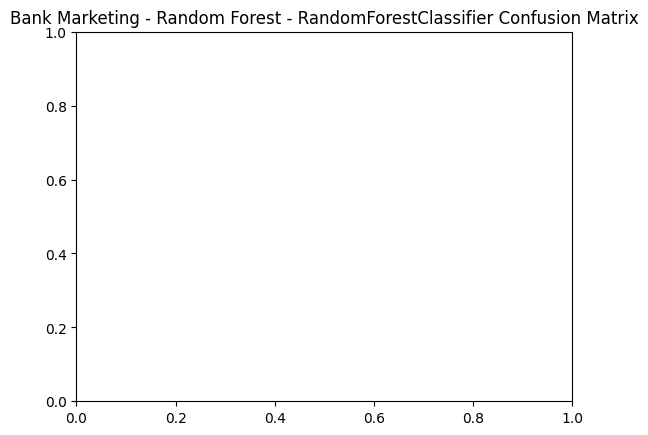

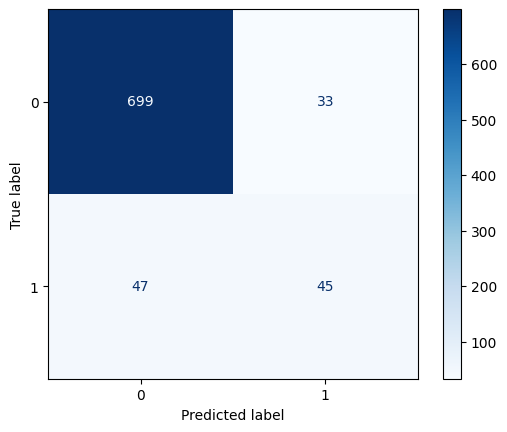

Random Forest: Accuracy = 0.9029, Kappa = 0.4757


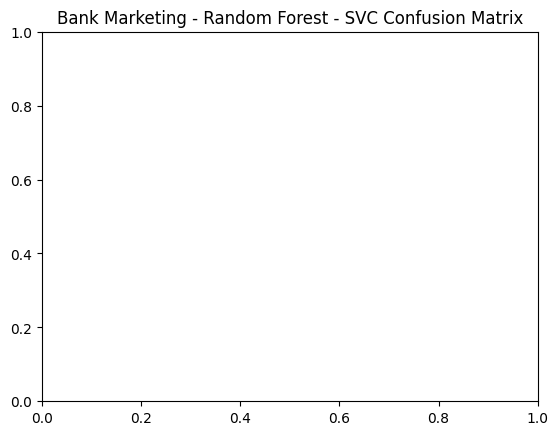

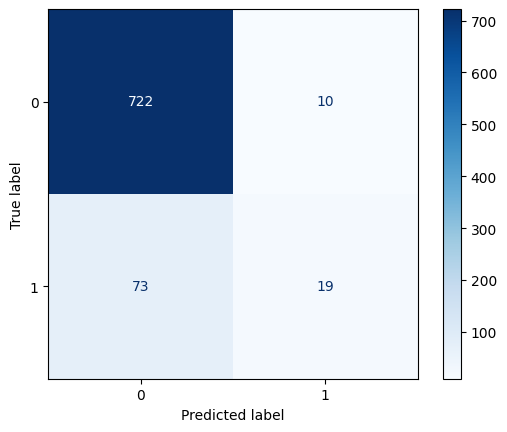

SVM: Accuracy = 0.8993, Kappa = 0.2753


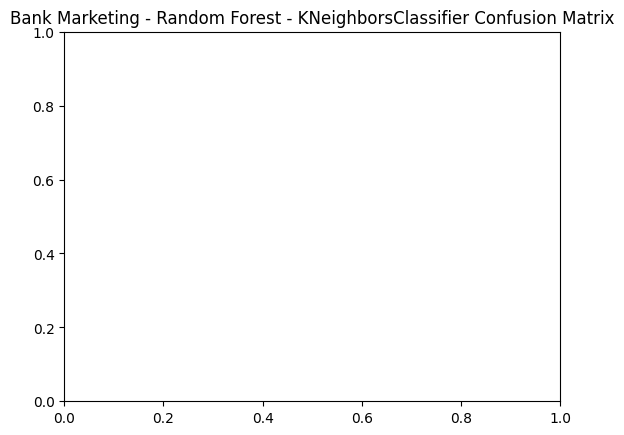

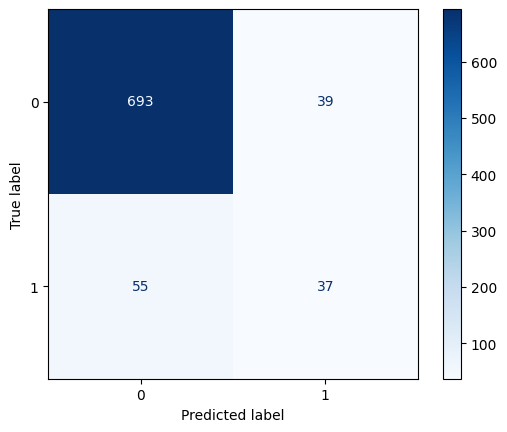

KNN: Accuracy = 0.8859, Kappa = 0.3776


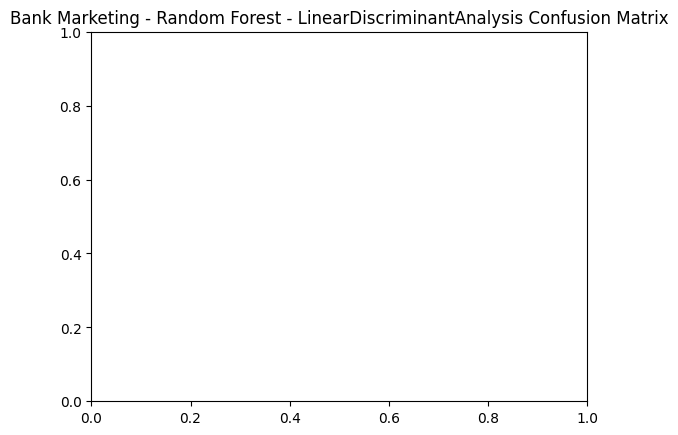

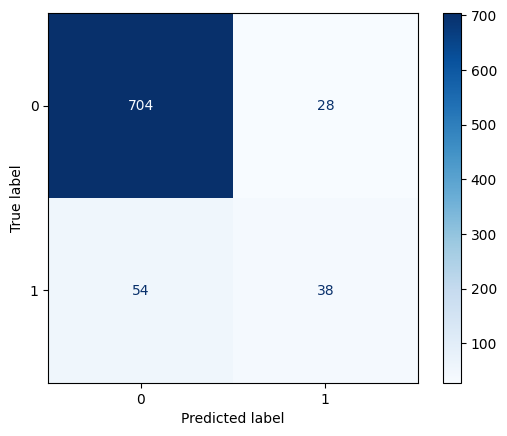

LDA: Accuracy = 0.9005, Kappa = 0.4276


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


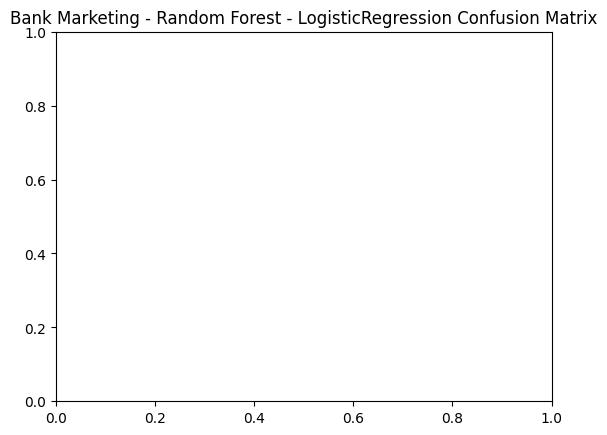

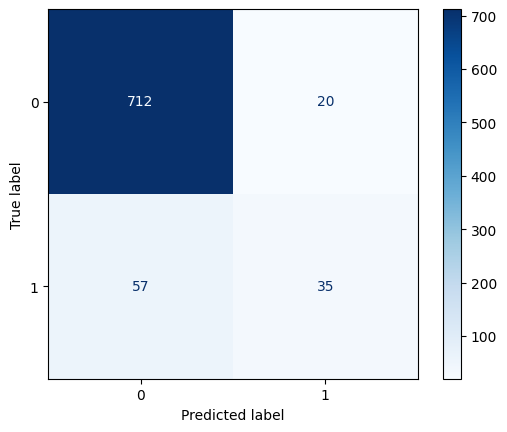

Logistic Regression: Accuracy = 0.9066, Kappa = 0.4284


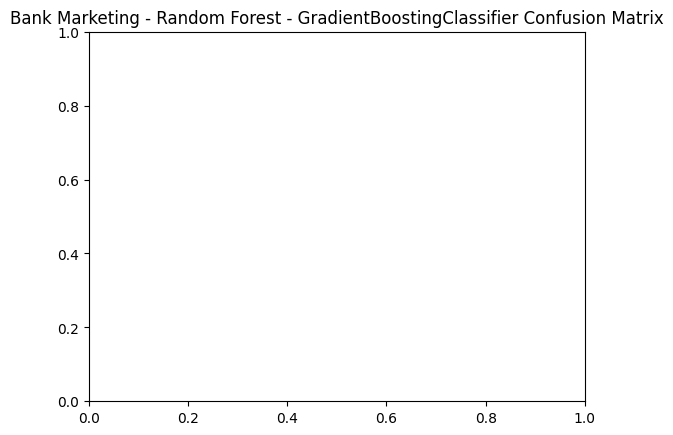

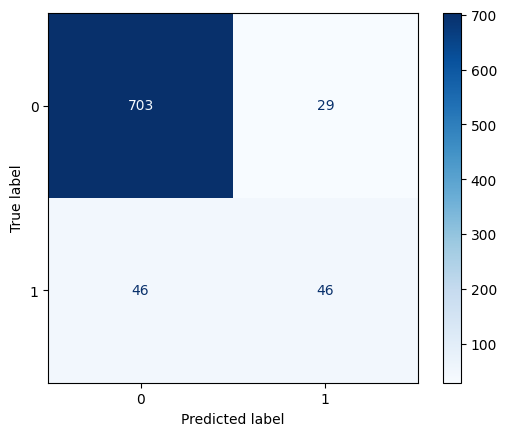

Gradient Boosting: Accuracy = 0.9090, Kappa = 0.5008


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


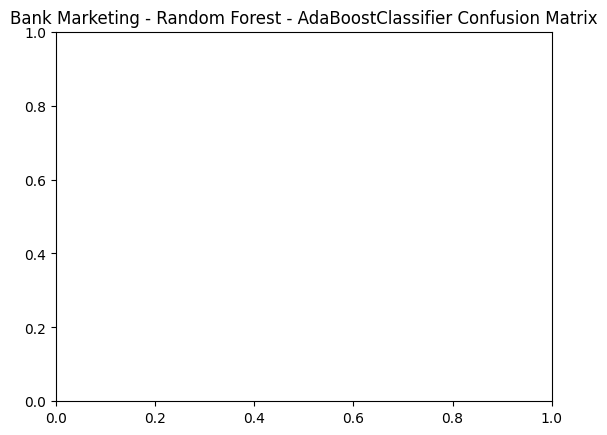

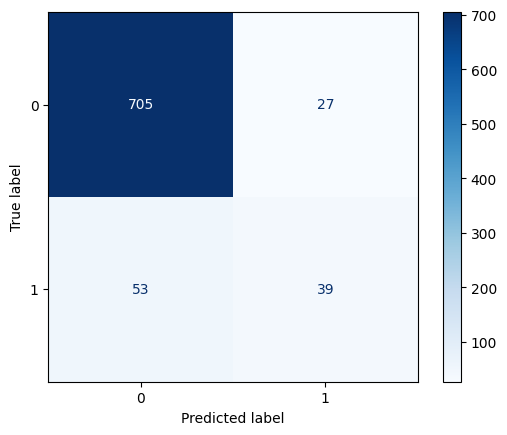

AdaBoost: Accuracy = 0.9029, Kappa = 0.4416


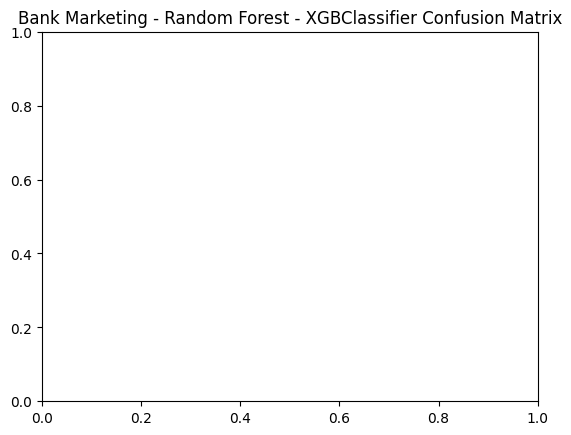

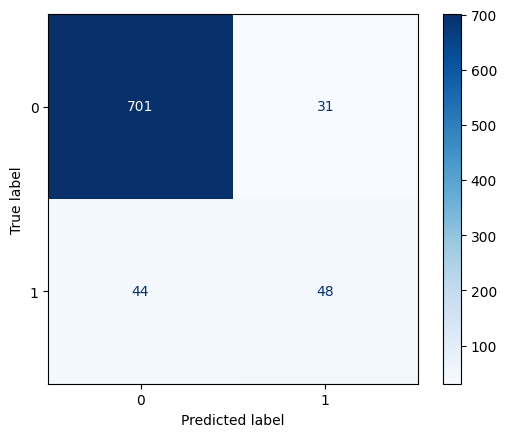

XGBoost: Accuracy = 0.9090, Kappa = 0.5110

Boruta ile Seçilen Özelliklerle Performans:


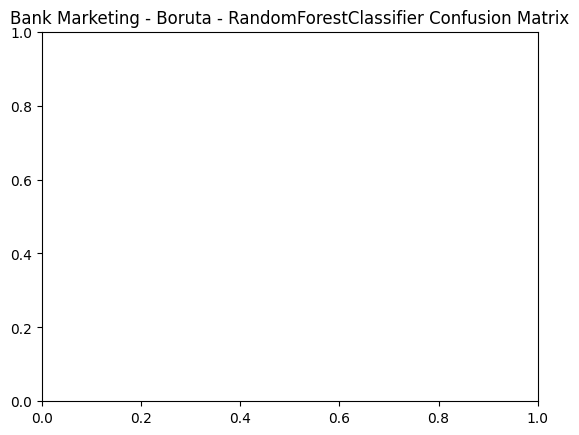

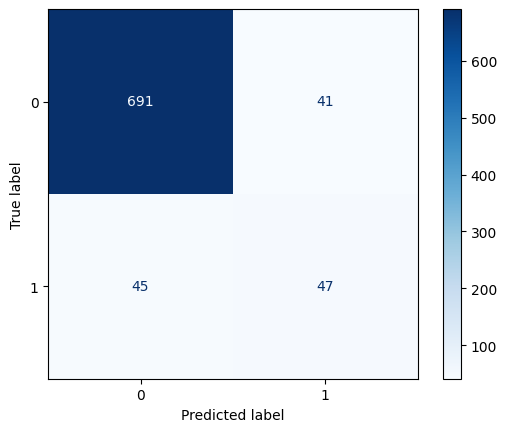

Random Forest: Accuracy = 0.8956, Kappa = 0.4637


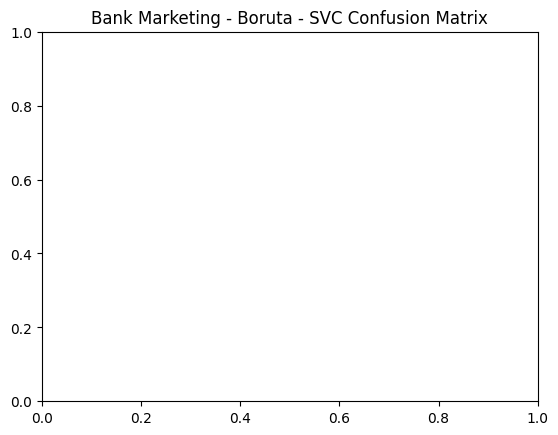

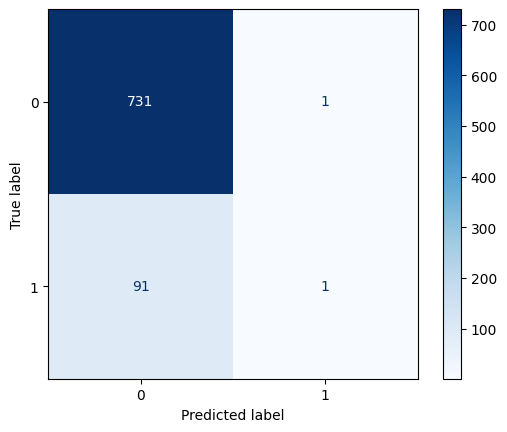

SVM: Accuracy = 0.8883, Kappa = 0.0166


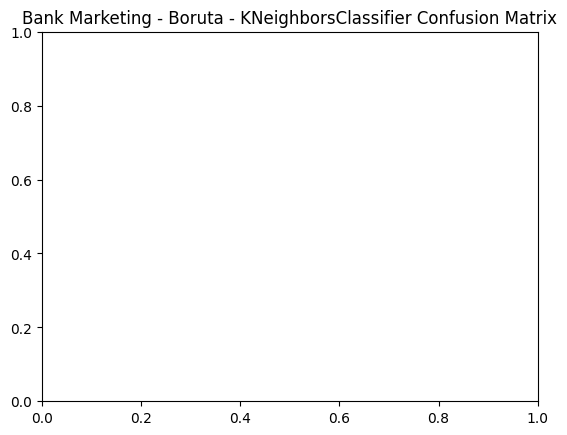

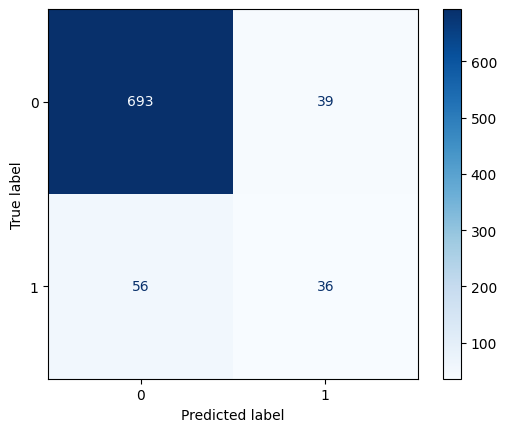

KNN: Accuracy = 0.8847, Kappa = 0.3677


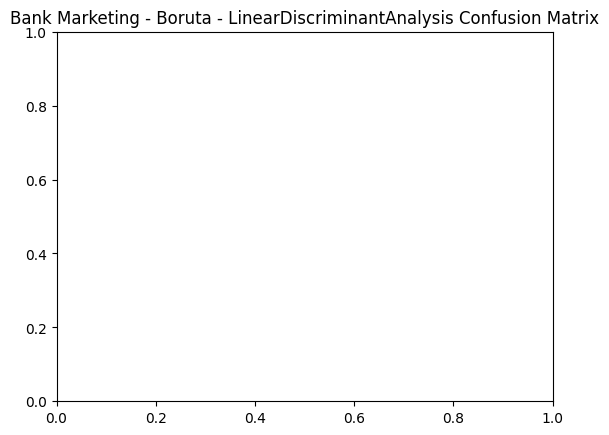

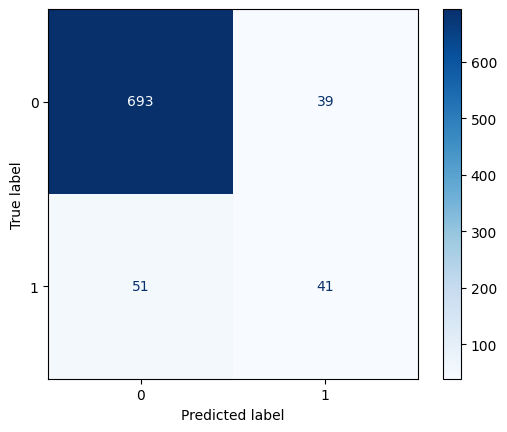

LDA: Accuracy = 0.8908, Kappa = 0.4161


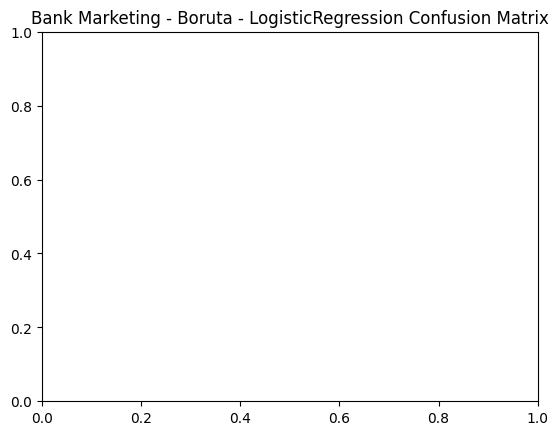

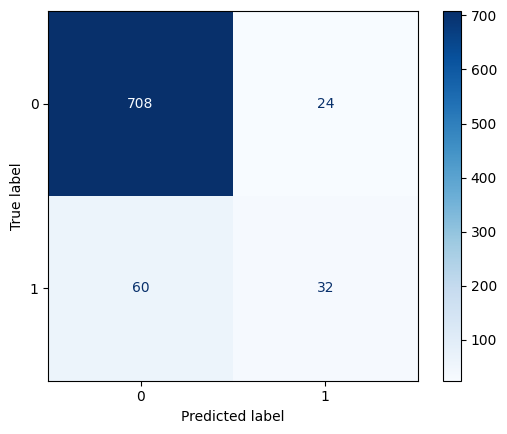

Logistic Regression: Accuracy = 0.8981, Kappa = 0.3801


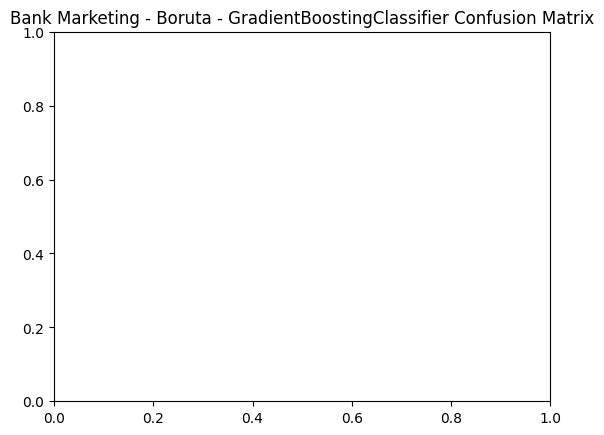

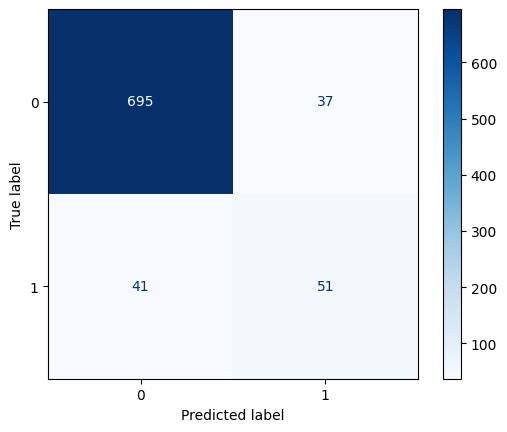

Gradient Boosting: Accuracy = 0.9053, Kappa = 0.5136


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


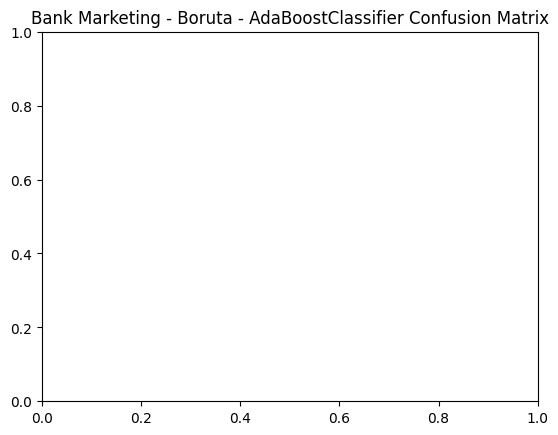

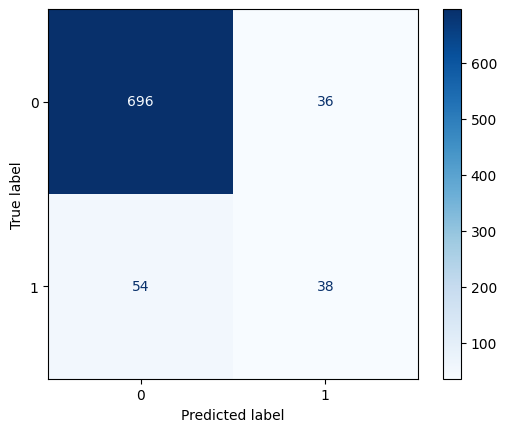

AdaBoost: Accuracy = 0.8908, Kappa = 0.3979


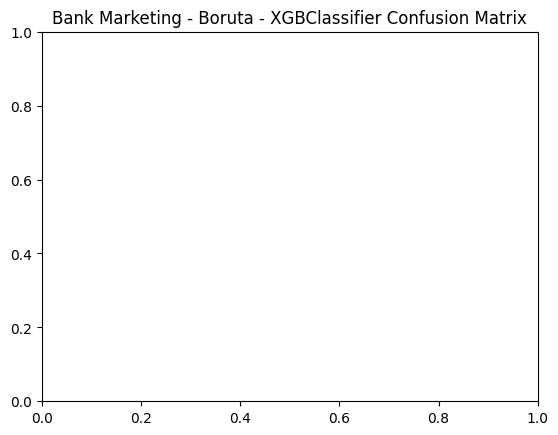

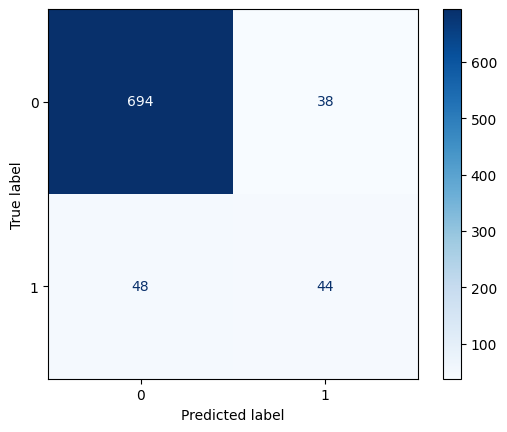

XGBoost: Accuracy = 0.8956, Kappa = 0.4476

RFE ile Seçilen Özelliklerle Performans:


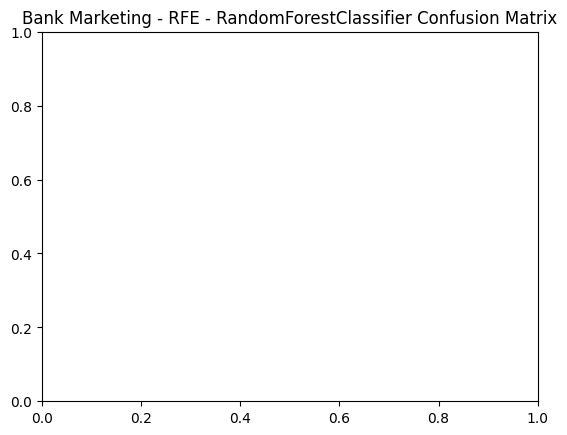

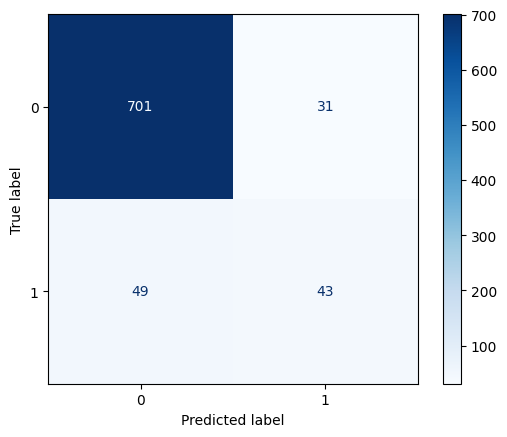

Random Forest: Accuracy = 0.9029, Kappa = 0.4648


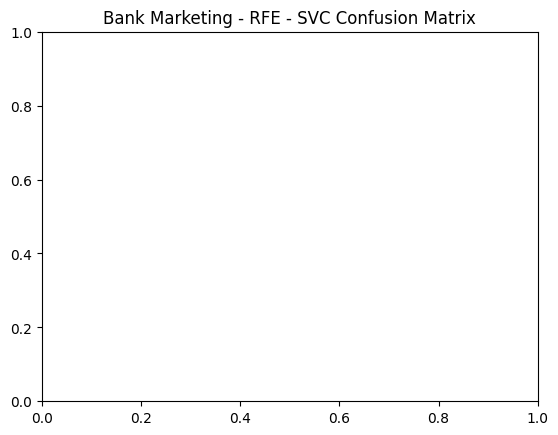

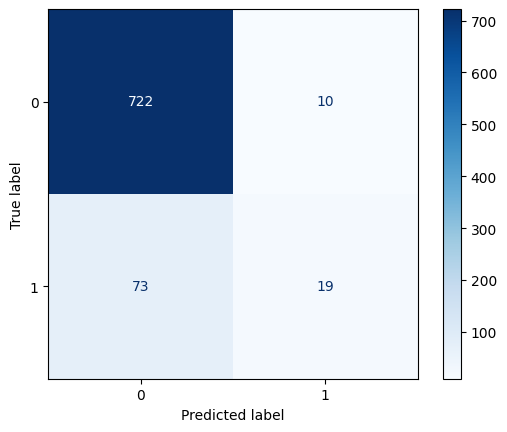

SVM: Accuracy = 0.8993, Kappa = 0.2753


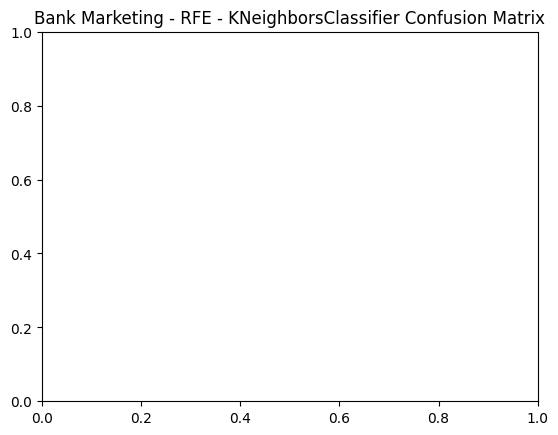

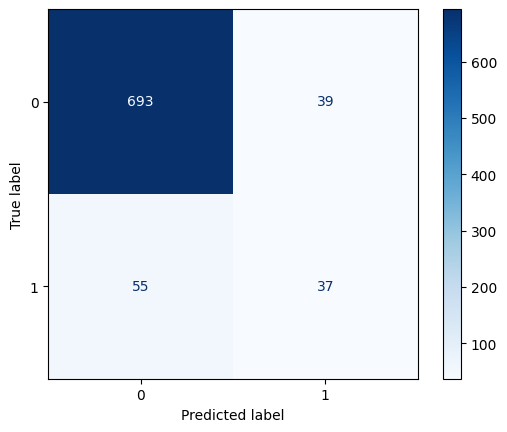

KNN: Accuracy = 0.8859, Kappa = 0.3776


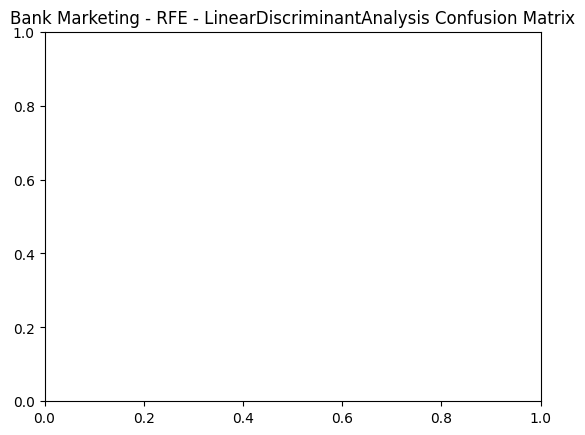

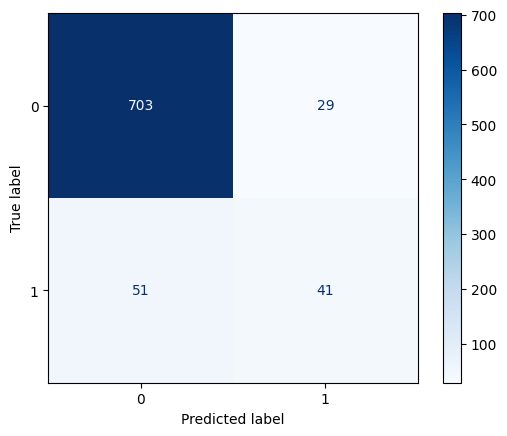

LDA: Accuracy = 0.9029, Kappa = 0.4534


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


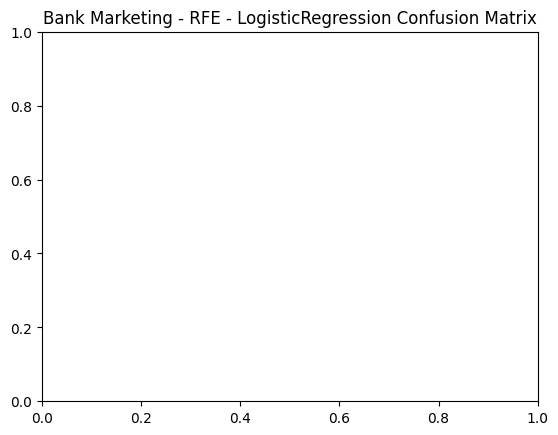

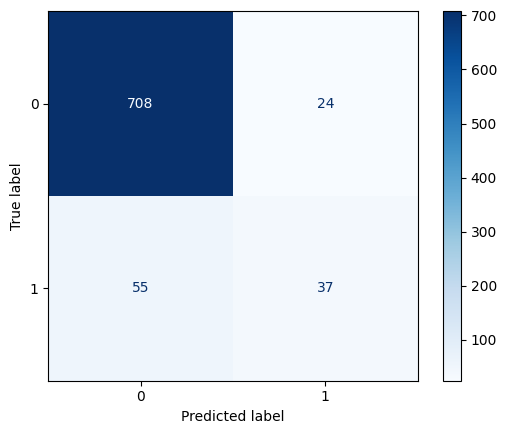

Logistic Regression: Accuracy = 0.9041, Kappa = 0.4332


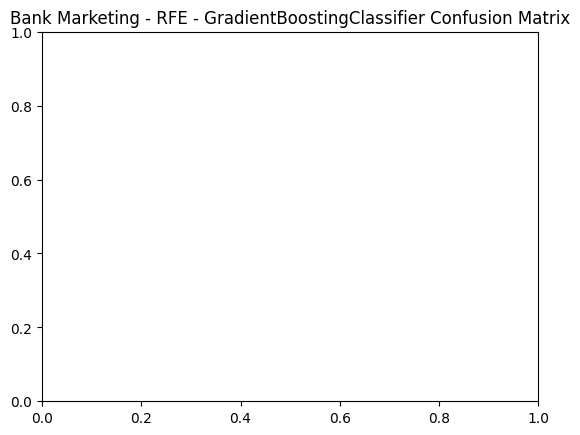

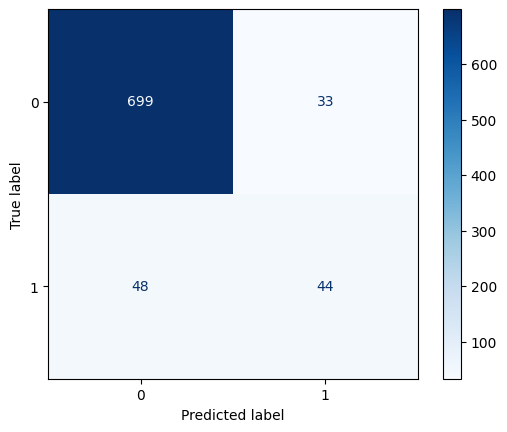

Gradient Boosting: Accuracy = 0.9017, Kappa = 0.4664


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


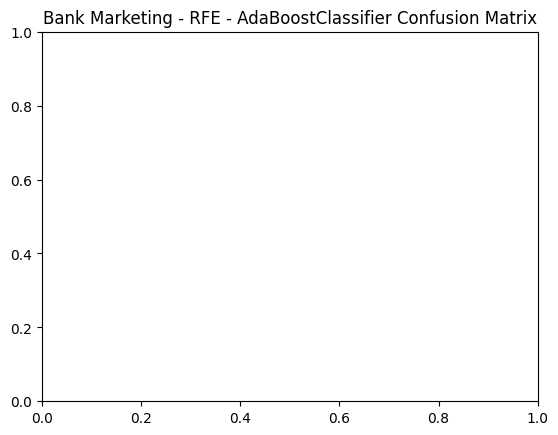

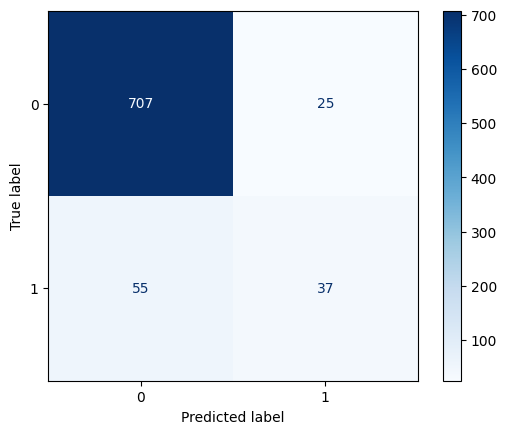

AdaBoost: Accuracy = 0.9029, Kappa = 0.4292


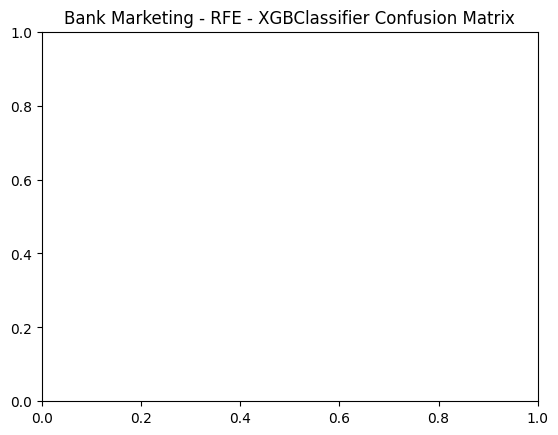

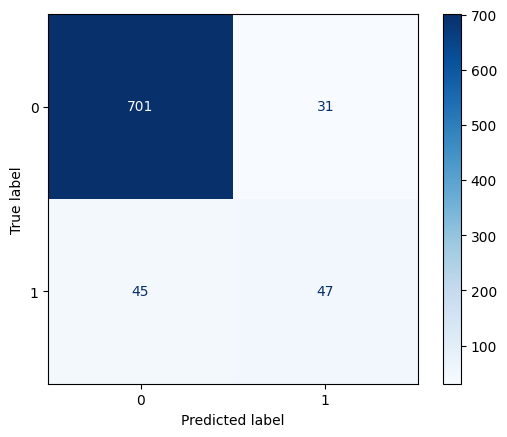

XGBoost: Accuracy = 0.9078, Kappa = 0.5019


In [1]:
!pip install boruta
import pandas as pd
import numpy as np
import requests  # Eksik kütüphane importu
import zipfile
import io
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier  # Eksik importlar
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay
from boruta import BorutaPy
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier  # Eksik import

# Veri yükleme işlemleri (örnek veri kümesi: Bank Marketing)
urls = {
    'Bank Marketing': 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip',
    'Car Evaluation': 'https://archive.ics.uci.edu/ml/machine-learning-databases/00447/car.data',
    'Human Activity Recognition': 'https://archive.ics.uci.edu/ml/machine-learning-databases/00275/HAR.csv'
}

# Örnek olarak Bank Marketing veri kümesi
url = urls['Bank Marketing']
response = requests.get(url)  # Veriyi indirmek için requests kullanılıyor
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    with z.open('bank-additional/bank-additional.csv') as f:
        df = pd.read_csv(f, sep=';', header=0)

# Veri Hazırlama (Bank Marketing)
X = df.drop('y', axis=1)  # Hedef sütunu kaldırma
y = df['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Binary encoding
X = pd.get_dummies(X)  # Kategorik değişkenleri sayısallaştırma

# Eğitim ve Test Kümesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellik Seçimi - Random Forest ile Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_
important_features_rf = X_train.columns[feature_importances > np.mean(feature_importances)]

# Boruta ile Özellik Seçimi
boruta = BorutaPy(rf, n_estimators='auto', verbose=0, random_state=42)
boruta.fit(X_train.values, y_train.values)
important_features_boruta = X_train.columns[boruta.support_]

# RFE (Recursive Feature Elimination) ile Özellik Seçimi
from sklearn.feature_selection import RFE  # RFE import edilmesi gerekiyor
rfe = RFE(rf, n_features_to_select=10)
rfe.fit(X_train, y_train)
important_features_rfe = X_train.columns[rfe.support_]

# Model Eğitimi ve Değerlendirme
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', C=1, gamma='scale'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'LDA': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}

# Fonksiyon: Model Performansını Değerlendirme
def evaluate_model(model, X_train, X_test, y_train, y_test, dataset_name, feature_method):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    # Başlık ekleme
    plt.title(f'{dataset_name} - {feature_method} - {model.__class__.__name__} Confusion Matrix')
    cm_display.plot(cmap='Blues')
    plt.show()

    return accuracy, kappa

# Seçilen Özelliklerle Modellerin Performansı
for method, features in zip(['Random Forest', 'Boruta', 'RFE'],
                            [important_features_rf, important_features_boruta, important_features_rfe]):
    print(f"\n{method} ile Seçilen Özelliklerle Performans:")
    for model_name, model in models.items():
        acc, kappa = evaluate_model(model, X_train[features], X_test[features], y_train, y_test, 'Bank Marketing', method)
        print(f"{model_name}: Accuracy = {acc:.4f}, Kappa = {kappa:.4f}")
